In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
data = open('/content/drive/My Drive/Colab Notebooks/TSF/Resources/pop.txt').read()

In [ ]:
tokenizer = Tokenizer()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
word_count = len(tokenizer.word_index) + 1
print("Total number of words: " + str(word_count))

Total number of words: 1921


In [ ]:
input_sequences = []

for line in corpus:
  sequence = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(sequence)):
    input_sequences.append(sequence[:i+1])

max_length = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_length, padding = 'pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes = word_count)

In [ ]:
starting_lr = 1e-4

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: starting_lr * 10**(epoch / 20))

In [ ]:
def create_model():
    return tf.keras.models.Sequential([
      tf.keras.layers.Embedding(word_count, 128, input_length = max_length - 1),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dense(word_count, activation = 'softmax')
    ])

In [ ]:
model = create_model()

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(lr = starting_lr),
    metrics = ['accuracy']
)

lr_test_history = model.fit(xs, ys, epochs = 100, callbacks = [lr_schedule])

(0.0001, 10.0, 0.0, 7.0)

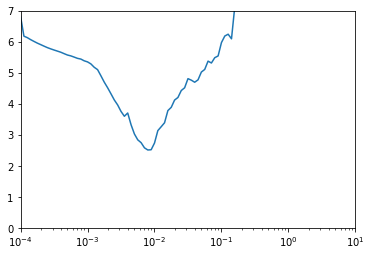

In [ ]:
lrs = starting_lr * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, lr_test_history.history["loss"])
plt.axis([starting_lr, starting_lr * (10 ** 5), 0, 7])

In [ ]:
model = create_model()

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(lr = 0.009),
    metrics = ['accuracy']
)

history = model.fit(xs, ys, epochs = 25)
model.save('/content/drive/My Drive/Colab Notebooks/TSF/Models/pop_model')

Epoch 1/25
268/268 [==============================] - 7s 12ms/step - loss: 6.6294 - accuracy: 0.0280
Epoch 2/25
268/268 [==============================] - 3s 12ms/step - loss: 5.8899 - accuracy: 0.0494
Epoch 3/25
268/268 [==============================] - 3s 12ms/step - loss: 5.8191 - accuracy: 0.0636
Epoch 4/25
268/268 [==============================] - 3s 12ms/step - loss: 5.3230 - accuracy: 0.0917
Epoch 5/25
268/268 [==============================] - 3s 12ms/step - loss: 4.9846 - accuracy: 0.1254
Epoch 6/25
268/268 [==============================] - 3s 12ms/step - loss: 4.6980 - accuracy: 0.1523
Epoch 7/25
268/268 [==============================] - 3s 12ms/step - loss: 4.3333 - accuracy: 0.1898
Epoch 8/25
268/268 [==============================] - 3s 12ms/step - loss: 4.0133 - accuracy: 0.2295
Epoch 9/25
268/268 [==============================] - 3s 13ms/step - loss: 3.6189 - accuracy: 0.2693
Epoch 10/25
268/268 [==============================] - 3s 12ms/step - loss: 3.2812 - accura

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/TSF/Models/pop_model/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/TSF/Models/pop_model/assets


In [ ]:
i = 1
history = model.fit(xs, ys, epochs = 25)
model.save('/content/drive/My Drive/Colab Notebooks/TSF/Models/pop_model_' + str(i))
i += 1

Epoch 1/25
268/268 [==============================] - 3s 12ms/step - loss: 0.7108 - accuracy: 0.7924
Epoch 2/25
268/268 [==============================] - 3s 12ms/step - loss: 0.6888 - accuracy: 0.7994
Epoch 3/25
268/268 [==============================] - 3s 12ms/step - loss: 0.6903 - accuracy: 0.7996
Epoch 4/25
268/268 [==============================] - 3s 12ms/step - loss: 0.6655 - accuracy: 0.8051
Epoch 5/25
268/268 [==============================] - 3s 12ms/step - loss: 0.6486 - accuracy: 0.8087
Epoch 6/25
268/268 [==============================] - 3s 12ms/step - loss: 0.6412 - accuracy: 0.8107
Epoch 7/25
268/268 [==============================] - 3s 12ms/step - loss: 0.6883 - accuracy: 0.7969
Epoch 8/25
268/268 [==============================] - 3s 13ms/step - loss: 0.7322 - accuracy: 0.7831
Epoch 9/25
268/268 [==============================] - 3s 12ms/step - loss: 0.7635 - accuracy: 0.7768
Epoch 10/25
268/268 [==============================] - 3s 12ms/step - loss: 0.7754 - accura

INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/TSF/Models/pop_model_1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/TSF/Models/pop_model_1/assets


<Figure size 432x288 with 0 Axes>

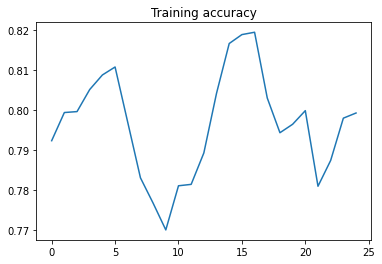

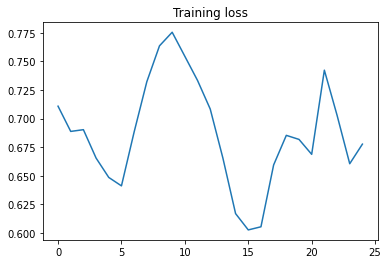

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')
plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.figure()

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/TSF/Models/pop_model_25')

I'm the one that he answers to go shot in my sea n' full of vodka rap full of faggots and crack it nada lick eye oh man oh some some me


In [ ]:
seed_text = "I'm the"
next_words = 30
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen = max_length - 1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I'm the one that he answers to go shot in my sea n' full of vodka rap full of faggots and crack it nada lick eye oh man oh some some me
